In [1]:
import xarray as xr
import numpy as np
import datetime
import pandas as pd
import gsw
from scipy import interpolate

import matplotlib as mpl
import matplotlib.pyplot as plt


import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

from matplotlib import colors
from matplotlib import ticker
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.animation as animation
from IPython.display import HTML

In [2]:

reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    }
}

In [3]:
## Function to crop the dataset
def Crops(coord, d_set):
    """
        Crops is a function that takes a data set and crops it into smaller
        region, using as parameters the values given by the dictionary 
        reg_ext.
        
        Parameters:
        ------------
            
        coord : string
            Key value that identifies the region to obtain
        
        d_set : DataArray
            Dataset to be cropped
        
        Output:
        -------
        new_ds : DataArray
            New data array corresponding to the region stated by 'coord'
    """
    
    lon1, lon2 = reg_ext[coord]['lon']
    lat1, lat2 = reg_ext[coord]['lat']
    name_fig = reg_ext[coord]['name']
    
    new_ds = d_set.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
    return(new_ds)


def Grid(data_set):
    x = data_set.longitude
    y = data_set.latitude
    
    x, y = np.meshgrid(x, y)
    return(x, y)


def No_nan(a):
    """
        No_nan is a function that helps to filter an array from nan values.
        
        Parameters:
        ------------
        a : Numpy Array
            Is the array we want to filter
        
        Output:
        -------
        a2 : Numpy Arrray
            Array with no nan values in it
    """
    nan_array = np.isnan(a)
    not_nan_array = ~ nan_array
    a2 = a[not_nan_array]
    
    return(a2)


def Map(ax, region, xtik, ytik):
    ax.set_global()
    ax.coastlines('50m')
    ax.set_xticks(xtik, crs=ccrs.PlateCarree())
    ax.set_yticks(ytik, crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()

    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.set_extent(region, crs=ccrs.PlateCarree())     #lat, lon
    ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
                 color='gray', alpha=0.5, linestyle='-.')



def Plot_Contours(data_set, reg, minl, maxl, nlevs, nlines, tstep=None, cmap=None):
    lon1, lon2 = reg_ext[reg]['lon']
    lat1, lat2 = reg_ext[reg]['lat']
    xtik = np.linspace(lon1, lon2, num=5)
    ytik = np.linspace(lat1, lat2, num=4)

    x_n, y_n = Grid(data_set)

    projection = ccrs.PlateCarree(360)
    region = [lon1, lon2, lat1, lat2]    #Lon, Lat
    
    if not cmap:
        cmap = 'magma_r'
    
    fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(projection=projection), figsize=(10,5))    
    
    Map(ax, region, xtik, ytik)
    
    if tstep==None:
        contr1 = ax.contourf(x_n, y_n, data_set.mlotst, levels=np.linspace(minl, maxl, nlevs),
                                     cmap=cmap, extend='both')
        contr2 = ax.contour(x_n, y_n, data_set.zo[0], nlines, linewidths=0.5, colors='k')
        cbar = fig.colorbar(contr1, ax=ax, shrink=0.855, orientation='vertical',
                            label='MLD [m]', extend='both')  
        #cbar.set_clim(10,120)
    else:
        contr1 = ax.contourf(x_n, y_n, data_set.mlotst[tstep], levels=np.linspace(minl, maxl, nlevs),
                                     cmap=cmap, extend='both')
        contr2 = ax.contour(x_n, y_n, data_set.zo[tstep,0], nlines, linewidths=0.5, colors='k')
        cbar = fig.colorbar(contr1, ax=ax, shrink=0.855, orientation='vertical',
                            label='MLD [m]', extend='both')  
        #cbar.set_clim(10,120)

    #fig.savefig(os.path.abspath(os.path.sep.join([".","dummy_images","Noe_%0.4d.png" % it])))
    #plt.close(fig)
    plt.show()

In [4]:
###############################################################################
###########         MAIN PROGRAM
###############################################################################

## Now working in any point in year 2005


dir_1 = '../../data_ARMOR/'
dir_2 = '../Vertical-prof/'
file1 = 'ARMOR_*.nc'
file2 = 'ARMOR_2005.nc'

just_1 = xr.open_dataset(dir_1 + file2)
all_fl = xr.open_mfdataset(dir_1 + file1)


/venv/py3-phyocean/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/venv/py3-phyocean/lib/python3.6/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


## Seasonal cycle

Here, calculating the climatology of the entire time series. In the Gulf Stream

In [5]:
reg = 'gul'
## File format :: t, lat, lon
gulf_a = Crops(reg, all_fl)
gulf_1 = Crops(reg, just_1)

In [6]:
clim = gulf_a.groupby('time.week').mean('time')
mean = gulf_1.mean('time')

/venv/py3-phyocean/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [7]:
clim.zo[0,0]

<xarray.DataArray 'zo' (latitude: 60, longitude: 120)>
dask.array<getitem, shape=(60, 120), dtype=float32, chunksize=(60, 120), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -74.875 -74.625 -74.375 ... -45.375 -45.125
    depth      float64 0.0
  * latitude   (latitude) float32 30.125 30.375 30.625 ... 44.375 44.625 44.875
    week       int64 1

In [8]:
## Now gulf_ds has two time coordinates: time & week number// now is not longer true
gulf_ds = gulf_1.groupby('time.week').mean('time') - clim

## Mean seasonal cycle in the Gulf Stream Comparisson: climatology, mean 2005 and de-seasoned(?)

/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


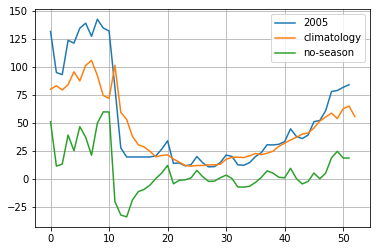

In [9]:
x = gulf_1.time

plt.plot(gulf_1.mlotst[:, 0, 20], label='2005')
plt.plot(clim.mlotst[:,0, 20], label='climatology')
plt.plot(gulf_ds.mlotst[:, 0, 20], label='no-season')
plt.legend()
plt.grid()
plt.show()


In [10]:
mini = clim.mlotst.min(skipna=True).values
maxi = clim.mlotst.max(skipna=True).values

print(mini, maxi)

/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


10.178502 629.2833


### Plot of the climatology. MLD and geopotential height

/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


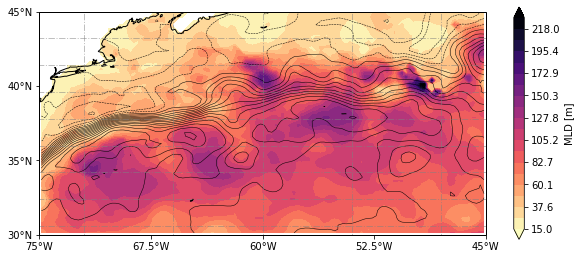

In [11]:
#Plot_Contours(amp, r, min_amp, max_amp-992.3, nlevs=25, nlines=20)
Plot_Contours(clim, reg, 15., maxi-400., 20, 20, tstep=0)

In [12]:
mini_ds = gulf_ds.mlotst.min(skipna=True).values
maxi_ds = gulf_ds.mlotst.max(skipna=True).values

print(mini_ds, maxi_ds)

/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


-607.9833 2242.2285


/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


## De-seasoned data

/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


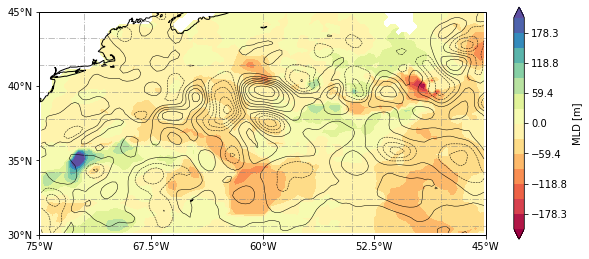

In [13]:
Plot_Contours(gulf_ds, reg, mini_ds+400., -mini_ds-400., 15, 15, tstep=0, cmap='Spectral')

## How much of the variability is due to the seasonal cycle? 

To measure this, I am going to calculate the standar deviation of the MLD. In one including the seasonal cycle, and the other with the seasonal cycle removed. Then, I will compare the ratio between both standar deviations. Now, what can we infer from the result?

In [20]:
# Variance of the 'raw' data
std_raw = gulf_1.std(dim='time', skipna=True)
std_raw

/venv/py3-phyocean/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<xarray.Dataset>
Dimensions:    (depth: 33, latitude: 60, longitude: 120)
Coordinates:
  * depth      (depth) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
  * latitude   (latitude) float32 30.125 30.375 30.625 ... 44.375 44.625 44.875
  * longitude  (longitude) float32 -74.875 -74.625 -74.375 ... -45.375 -45.125
Data variables:
    mlotst     (latitude, longitude) float32 37.374783 34.58484 ... 20.28886
    so         (depth, latitude, longitude) float32 0.1867252 0.1798158 ... nan
    to         (depth, latitude, longitude) float32 3.0966477 3.0705066 ... nan
    ugo        (depth, latitude, longitude) float32 0.14050834 ... nan
    vgo        (depth, latitude, longitude) float32 0.13743341 ... nan
    zo         (depth, latitude, longitude) float32 0.09250611 ... nan

In [21]:
std_des = gulf_ds.std(dim='week', skipna=True)
std_des.mlotst[0]

<xarray.DataArray 'mlotst' (longitude: 120)>
dask.array<getitem, shape=(120,), dtype=float32, chunksize=(120,), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float32 -74.875 -74.625 -74.375 ... -45.375 -45.125
    latitude   float32 30.125

In [22]:
s = std_des - std_raw 
std_ch = s/std_raw

In [23]:
std_ch.mlotst

var_min = std_ch.mlotst.min(skipna=True).values
var_max = std_ch.mlotst.max(skipna=True).values

print(var_min, var_max)

/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/venv/py3-phyocean/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


-0.82648426 5.715768


/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/venv/py3-phyocean/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/venv/py3-phyocean/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/venv/py3-phyocean/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


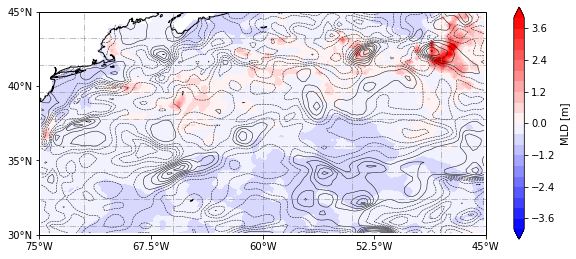

In [26]:
Plot_Contours(std_ch, reg, -4., 4., 21, 15, tstep=None, cmap='bwr')

Now I want to see where the no seasonal gph contours are. Are they over the points of high/low variance of MLD due no seasonal cycle effect?

In [27]:
## Calculating the mean of de-seasoned values
mean = gulf_1.mean('time')

ds_mean = gulf_ds.mean('week')
ds_mean

/venv/py3-phyocean/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:    (depth: 33, latitude: 60, longitude: 120)
Coordinates:
  * longitude  (longitude) float32 -74.875 -74.625 -74.375 ... -45.375 -45.125
  * depth      (depth) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
  * latitude   (latitude) float32 30.125 30.375 30.625 ... 44.375 44.625 44.875
Data variables:
    mlotst     (latitude, longitude) float32 dask.array<chunksize=(60, 120), meta=np.ndarray>
    so         (depth, latitude, longitude) float32 dask.array<chunksize=(33, 60, 120), meta=np.ndarray>
    to         (depth, latitude, longitude) float32 dask.array<chunksize=(33, 60, 120), meta=np.ndarray>
    ugo        (depth, latitude, longitude) float32 dask.array<chunksize=(33, 60, 120), meta=np.ndarray>
    vgo        (depth, latitude, longitude) float32 dask.array<chunksize=(33, 60, 120), meta=np.ndarray>
    zo         (depth, latitude, longitude) float32 dask.array<chunksize=(33, 60, 120), meta=np.ndarray>

/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/venv/py3-phyocean/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/venv/py3-phyocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


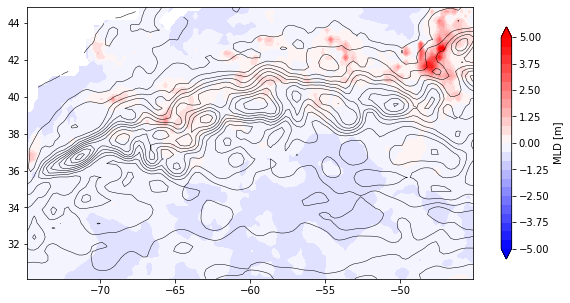

In [33]:
x_n, y_n = Grid(std_ch)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))    
    
contr1 = ax.contourf(x_n, y_n, std_ch.mlotst, levels=np.linspace(-5., 5., 25),
                             cmap='bwr', extend='both')
contr2 = ax.contour(x_n, y_n, std_des.zo[0], 11, linewidths=0.5, colors='k')
cbar = fig.colorbar(contr1, ax=ax, shrink=0.855, orientation='vertical',
                    label='MLD [m]', extend='both')  
#cbar.set_clim(-6., 6.)
plt.show()